# 머신러닝 실습

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
csv_path = '/content/drive/MyDrive/fly_ai/2주차/2주차학습데이터/diabetes.csv'
df = pd.read_csv(csv_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols]==0).sum(axis=0)


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

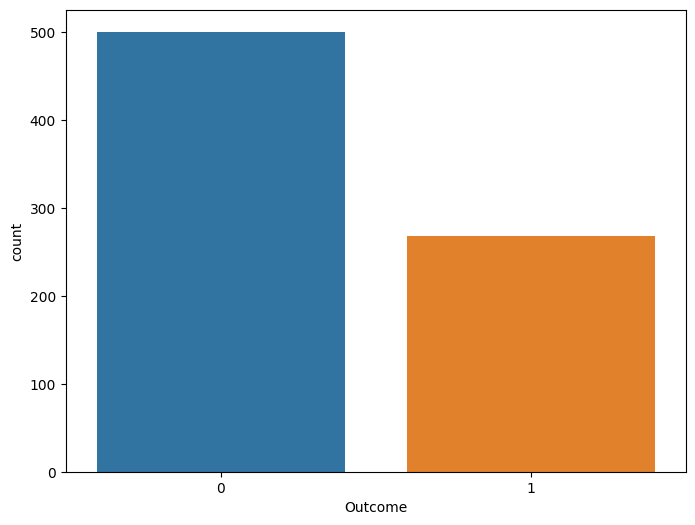

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='Outcome',data=df)
plt.show()

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
x_data = df.drop(['Outcome'], axis = 1)
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y_data = df['Outcome']
y_data.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


In [ ]:
# 이상치 처리-이상치에 평균 적용
import numpy as np

def impute_zero(data,col):
  df=data.loc[data[col] !=0 , col]
  avg=np.sum(df)/len(df)
  k=len(data.loc[data[col]==0, col])
  data.loc[data[col] ==0, col] = avg
  print('%s : fixed %d, mean: %.3f' %(col,k,avg))

for col in cols:
  impute_zero(X_train, col)

Glucose : fixed 5, mean: 121.847
BloodPressure : fixed 24, mean: 72.239
SkinThickness : fixed 176, mean: 28.596
Insulin : fixed 290, mean: 154.330
BMI : fixed 7, mean: 32.352


In [ ]:
# 이상치 확인

(X_train[cols] ==0).sum(axis=0)

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [ ]:
# 테스트 데이터 이상치 처리

for col in cols:
  impute_zero(X_test, col)

Glucose : fixed 0, mean: 121.052
BloodPressure : fixed 11, mean: 73.091
SkinThickness : fixed 51, mean: 31.524
Insulin : fixed 84, mean: 161.186
BMI : fixed 4, mean: 32.883


In [ ]:
# 테스트 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print(X_train_s[:5])

[[-5.26396861e-01 -1.25832567e+00  0.00000000e+00  4.22787785e-16
   0.00000000e+00  1.02533391e-15 -4.90734790e-01 -1.03594038e+00]
 [ 1.58804586e+00 -3.27397242e-01  8.07407436e-01 -5.46930179e-01
   0.00000000e+00 -5.99178052e-01  2.41502991e+00  1.48710085e+00]
 [-8.28460107e-01  5.70283740e-01 -2.17042447e+00 -1.14195109e+00
  -8.20791983e-01 -5.27026593e-01  5.49160552e-01 -9.48938958e-01]
 [-1.13052335e+00  1.30172750e+00 -1.83955426e+00  4.22787785e-16
   0.00000000e+00 -1.50828644e+00 -6.39291267e-01  2.79212217e+00]
 [ 6.81856121e-01  4.04046521e-01  6.41972330e-01  1.00012419e+00
   2.48169622e+00  1.99827450e+00 -6.86829340e-01  1.13909516e+00]]


In [ ]:
# 넘파이 배열로 타입 변경- 이상치 확인

y_train = y_train.values
y_test=y_test.values

print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# 모델 만들기

from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  model.add(layers.Dense(12,input_dim=8, activation='relu'))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                108       
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.losses import MeanSquaredError
model.compile(loss=MeanSquaredError(), optimizer='adam', metrics=['acc'])

In [ ]:
# 모델 학습
history = model.fit(X_train_s, y_train, epochs=500, batch_size=16, validation_split=0.2,verbose=1)

Epoch 1/500
31/31 [==============================] - 2s 10ms/step - loss: 0.2368 - acc: 0.9124 - val_loss: 2.0480 - val_acc: 0.7073
Epoch 2/500
31/31 [==============================] - 0s 3ms/step - loss: 0.2345 - acc: 0.9145 - val_loss: 2.0588 - val_acc: 0.7154
Epoch 3/500
31/31 [==============================] - 0s 3ms/step - loss: 0.2343 - acc: 0.9124 - val_loss: 2.0525 - val_acc: 0.6992
Epoch 4/500
31/31 [==============================] - 0s 4ms/step - loss: 0.2360 - acc: 0.9165 - val_loss: 2.0681 - val_acc: 0.7073
Epoch 5/500
31/31 [==============================] - 0s 4ms/step - loss: 0.2344 - acc: 0.9185 - val_loss: 2.0598 - val_acc: 0.6992
Epoch 6/500
31/31 [==============================] - 0s 3ms/step - loss: 0.2324 - acc: 0.9165 - val_loss: 2.0543 - val_acc: 0.6911
Epoch 7/500
31/31 [==============================] - 0s 4ms/step - loss: 0.2320 - acc: 0.9145 - val_loss: 2.0519 - val_acc: 0.6748
Epoch 8/500
31/31 [==============================] - 0s 4ms/step - loss: 0.2321 - 

In [ ]:
history2 = model.fit(X_train_s, y_train, epochs=500, batch_size=16, validation_split=0.2,verbose=1)

Epoch 1/500
31/31 [==============================] - 1s 13ms/step - loss: 1.0818 - acc: 0.9287 - val_loss: 3.0745 - val_acc: 0.6585
Epoch 2/500
31/31 [==============================] - 0s 5ms/step - loss: 0.6020 - acc: 0.8534 - val_loss: 2.4133 - val_acc: 0.6423
Epoch 3/500
31/31 [==============================] - 0s 4ms/step - loss: 0.4366 - acc: 0.8330 - val_loss: 2.0378 - val_acc: 0.6423
Epoch 4/500
31/31 [==============================] - 0s 5ms/step - loss: 0.3451 - acc: 0.8187 - val_loss: 1.8360 - val_acc: 0.6504
Epoch 5/500
31/31 [==============================] - 0s 5ms/step - loss: 0.2951 - acc: 0.8106 - val_loss: 1.6188 - val_acc: 0.6423
Epoch 6/500
31/31 [==============================] - 0s 5ms/step - loss: 0.2554 - acc: 0.8147 - val_loss: 1.5326 - val_acc: 0.6423
Epoch 7/500
31/31 [==============================] - 0s 5ms/step - loss: 0.2340 - acc: 0.8167 - val_loss: 1.4841 - val_acc: 0.6504
Epoch 8/500
31/31 [==============================] - 0s 4ms/step - loss: 0.2175 - 

In [ ]:
# 학습곡선 그리기

import matplotlib.pyplot as plt

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'],hist['loss'],label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label='Val Loss')

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'],hist['acc'],label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],label='Val Accuracy')
  plt.legend()

  plt.show()


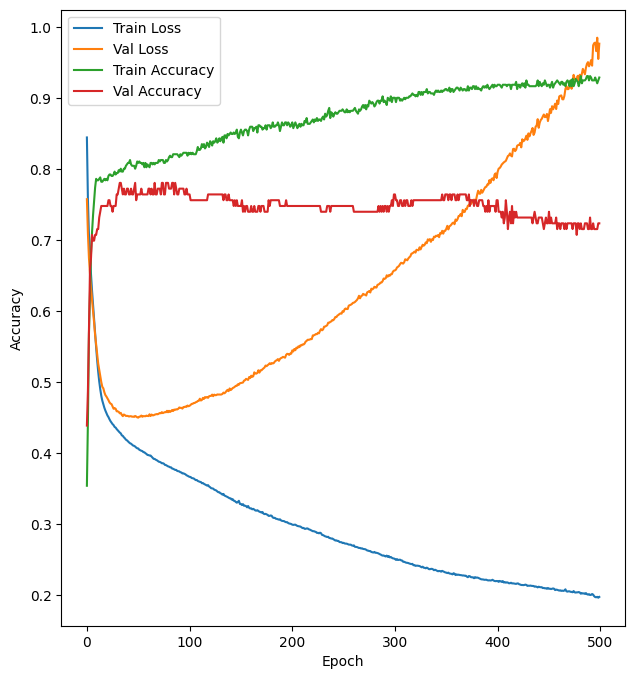

In [ ]:
plot_history(history)

# 날씨 예측 실습

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fly_ai/2주차/2주차학습데이터/air_quality_no2_long.csv')
df

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,microgram per m^3
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,microgram per m^3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,microgram per m^3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,microgram per m^3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,microgram per m^3
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,microgram per m^3
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,microgram per m^3
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,microgram per m^3
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,microgram per m^3


In [ ]:
df.shape

(2068, 7)

## 불필요한 확인 후 값 제거

In [ ]:
print(df['location'].value_counts())
print(df['city'].value_counts())
print(df['country'].value_counts())

FR04014               1004
London Westminster     969
BETR801                 95
Name: location, dtype: int64
Paris        1004
London        969
Antwerpen      95
Name: city, dtype: int64
FR    1004
GB     969
BE      95
Name: country, dtype: int64


In [ ]:
df = df.drop(['parameter', 'unit', 'city', 'location'], axis=1)

## data값 확인

In [ ]:
df["date.utc"].min(), df["date.utc"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [ ]:
df['date.utc'] = pd.to_datetime(df['date.utc'])

In [ ]:
df

,country,date.utc,value
0,FR,2019-06-21 00:00:00+00:00,20.0
1,FR,2019-06-20 23:00:00+00:00,21.8
2,FR,2019-06-20 22:00:00+00:00,26.5
3,FR,2019-06-20 21:00:00+00:00,24.9
4,FR,2019-06-20 20:00:00+00:00,21.4
...,...,...,...
2063,GB,2019-05-07 06:00:00+00:00,26.0
2064,GB,2019-05-07 04:00:00+00:00,16.0
2065,GB,2019-05-07 03:00:00+00:00,19.0
2066,GB,2019-05-07 02:00:00+00:00,19.0


In [ ]:
print(df['month'].value_counts())

5    1256
6     812
Name: month, dtype: int64


Text(0.5, 0, 'Month')

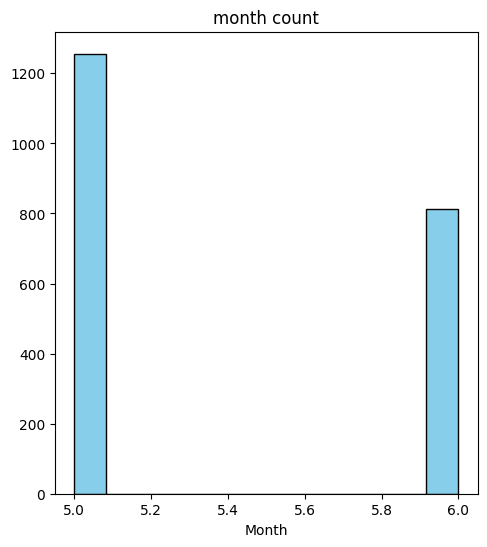

In [ ]:
df['month'] = df['date.utc'].dt.month
df['day'] = df['date.utc'].dt.day

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['month'], bins=12, color='skyblue', edgecolor='black')
plt.title('month count')
plt.xlabel('Month')

## 요일별 평균 value값

In [ ]:
df.groupby([df["date.utc"].dt.weekday, "country"])["value"].mean()

date.utc  country
0         BE         27.875000
          FR         24.856250
          GB         23.969697
1         BE         22.214286
          FR         30.999359
          GB         24.885714
2         BE         21.125000
          FR         29.165753
          GB         23.460432
3         BE         27.500000
          FR         28.600690
          GB         24.780142
4         BE         28.400000
          FR         31.617986
          GB         26.446809
5         BE         33.500000
          FR         25.266154
          GB         24.977612
6         BE         21.896552
          FR         23.274306
          GB         24.859155
Name: value, dtype: float64

## 시간별 평군 value 값

In [ ]:
pd.set_option('display.max_rows', None)

result = df.groupby([df["date.utc"].dt.hour, "country"])["value"].mean()
print(result)

AttributeError: ignored

In [ ]:
df['time_encoding'] = df['date.utc'].dt.hour

## 인덱싱

In [ ]:
country_mapping = {'FR': 0, 'GB': 1, 'BE': 2}
df['country_encoding'] = df['country'].map(country_mapping)

In [ ]:
df

,country,date.utc,value,month,day,time_encoding,country_encoding
0,FR,2019-06-21 00:00:00+00:00,20.0,6,21,0,0
1,FR,2019-06-20 23:00:00+00:00,21.8,6,20,23,0
2,FR,2019-06-20 22:00:00+00:00,26.5,6,20,22,0
3,FR,2019-06-20 21:00:00+00:00,24.9,6,20,21,0
4,FR,2019-06-20 20:00:00+00:00,21.4,6,20,20,0
...,...,...,...,...,...,...,...
2063,GB,2019-05-07 06:00:00+00:00,26.0,5,7,6,1
2064,GB,2019-05-07 04:00:00+00:00,16.0,5,7,4,1
2065,GB,2019-05-07 03:00:00+00:00,19.0,5,7,3,1
2066,GB,2019-05-07 02:00:00+00:00,19.0,5,7,2,1


## 학습

In [ ]:
x = df[['value', 'time_encoding']]
y = df['country_encoding']

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=x_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
42/42 [==============================] - 3s 14ms/step - loss: 1.0251 - accuracy: 0.4467 - val_loss: 0.9558 - val_accuracy: 0.4411
Epoch 2/500
42/42 [==============================] - 0s 8ms/step - loss: 0.8996 - accuracy: 0.4913 - val_loss: 0.8762 - val_accuracy: 0.4411
Epoch 3/500
42/42 [==============================] - 0s 6ms/step - loss: 0.8580 - accuracy: 0.4996 - val_loss: 0.8529 - val_accuracy: 0.5166
Epoch 4/500
42/42 [==============================] - 0s 3ms/step - loss: 0.8285 - accuracy: 0.5034 - val_loss: 0.8478 - val_accuracy: 0.5468
Epoch 5/500
42/42 [==============================] - 0s 5ms/step - loss: 0.8406 - accuracy: 0.5246 - val_loss: 0.8456 - val_accuracy: 0.5287
Epoch 6/500
42/42 [==============================] - 0s 3ms/step - loss: 0.8219 - accuracy: 0.5306 - val_loss: 0.8416 - val_accuracy: 0.5770
Epoch 7/500
42/42 [==============================] - 0s 4ms/step - loss: 0.8165 - accuracy: 0.5548 - val_loss: 0.8402 - val_accuracy: 0.5801
Epoch 8/500


In [ ]:
test = {'value': [25.0], 'time_encoding': [10]}

test_transform = scaler.transform(pd.DataFrame(test, columns=['value', 'time_encoding']))

prediction = model.predict_classes(test_transform)

print(f'예측값 : {prediction}')


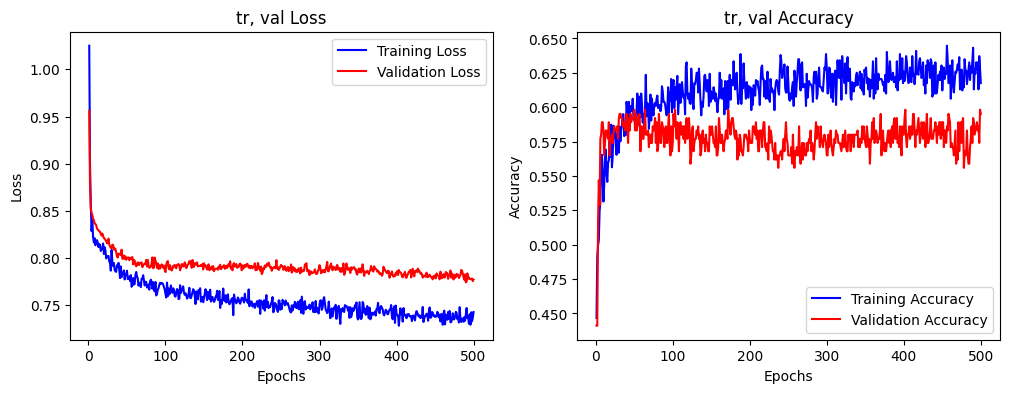

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('tr, val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('tr, val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# SPAM 데이터 실습

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fly_ai/2주차/2주차학습데이터/spam.csv', encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
duplicates = df[df.duplicated()]

df = df.drop_duplicates()
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = df['v2']
y = df['v1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9854932301740812
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       889
        spam       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
spam_messages = df[df['v1'] == 'spam']['v2']

tokenized_spam_words = []
for message in spam_messages:
    tokens = word_tokenize(message)
    filtered_tokens = [word for word in tokens if word.isalpha()]
    tokenized_spam_words.extend(filtered_tokens)

print("토큰:")
print(tokenized_spam_words)

토큰:
['Free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', 'May', 'Text', 'FA', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'T', 'C', 'apply', 'FreeMsg', 'Hey', 'there', 'darling', 'it', 'been', 'week', 'now', 'and', 'no', 'word', 'back', 'I', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'to', 'send', 'to', 'rcv', 'WINNER', 'As', 'a', 'valued', 'network', 'customer', 'you', 'have', 'been', 'selected', 'to', 'receivea', 'prize', 'reward', 'To', 'claim', 'call', 'Claim', 'code', 'Valid', 'hours', 'only', 'Had', 'your', 'mobile', 'months', 'or', 'more', 'U', 'R', 'entitled', 'to', 'Update', 'to', 'the', 'latest', 'colour', 'mobiles', 'with', 'camera', 'for', 'Free', 'Call', 'The', 'Mobile', 'Update', 'Co', 'FREE', 'on', 'SIX', 'chances', 'to', 'win', 'CASH', 'From', 'to', 'pounds', 'txt', 'and', 'send', 'to', 'Cost', 'TsandCs', 'apply', 'Reply', 'HL', 'info', 'URGENT', 'You', 'have', 'won

In [ ]:
from collections import Counter

word_frequencies = Counter(tokenized_spam_words)

top_words = word_frequencies.most_common(10)

print("빈도수:")
for word, frequency in top_words:
    print(f"{word}: {frequency}")


빈도수:
to: 525
a: 314
you: 174
your: 171
call: 165
the: 160
or: 155
for: 153
is: 136
Call: 118


In [ ]:
ham_messages = df[df['v1'] == 'ham']['v2']

tokenized_ham_words = []
for message in ham_messages:
    tokens = word_tokenize(message)
    filtered_tokens = [word for word in tokens if word.isalpha()]
    tokenized_ham_words.extend(filtered_tokens)

print("토큰:")
print(tokenized_ham_words)

토큰:
['Go', 'until', 'jurong', 'point', 'crazy', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'there', 'got', 'amore', 'wat', 'Ok', 'lar', 'Joking', 'wif', 'u', 'oni', 'U', 'dun', 'say', 'so', 'early', 'hor', 'U', 'c', 'already', 'then', 'say', 'Nah', 'I', 'do', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though', 'Even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'They', 'treat', 'me', 'like', 'aids', 'patent', 'As', 'per', 'your', 'request', 'Melle', 'Oru', 'Minnaminunginte', 'Nurungu', 'Vettam', 'has', 'been', 'set', 'as', 'your', 'callertune', 'for', 'all', 'Callers', 'Press', 'to', 'copy', 'your', 'friends', 'Callertune', 'I', 'gon', 'na', 'be', 'home', 'soon', 'and', 'i', 'do', 'want', 'to', 'talk', 'about', 'this', 'stuff', 'anymore', 'tonight', 'k', 'I', 'cried', 'enough', 'today', 'I', 'been', 'searching', 'for', 'the', 'right', 'words', 'to', 'thank', 'you', 'for', 'this', 'breather', 

In [ ]:
from collections import Counter

word_frequencies2 = Counter(tokenized_ham_words)

top_words2 = word_frequencies2.most_common(10)

print("빈도수:")
for word2, frequency2 in top_words2:
    print(f"{word2}: {frequency2}")


빈도수:
I: 1780
you: 1648
to: 1460
the: 957
i: 908
a: 886
and: 718
in: 704
me: 676
u: 647


## 학습

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

X = df['v2']
y = df['v1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

model = MultinomialNB()

model.fit(X_train_vectorized, y_train)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Report:\n{classification_rep}")



Accuracy: 0.9854932301740812
Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       889
        spam       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



## 빈도수 높은 단어 넣었을 경우 예측

In [ ]:
my_test = ["to a you your call the  asd as  ad as d asda s ds"]
my_test_vector = vectorizer.transform(my_test)
prediction = model.predict(my_test_vector)

print(f"The sentence '{my_test[0]}' is predicted as: {prediction[0]}")

The sentence 'to a you your call the  asd as  ad as d asda s ds' is predicted as: ham


## boston_house 실습

In [3]:
import pandas as pd

* CRIM: 범죄율
* INDUS: 비소매상업지역 면적 비율
* NOX: 일산화질소 농도
* RM: 주택당 방 수
* LSTAT: 인구 중 하위 계층 비율
* B: 인구 중 흑인 비율
* PTRATIO: 학생/교사 비율
* ZN: 25,000 평방피트를 초과 거주지역 비율
* CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
* AGE: 1940년 이전에 건축된 주택의 비율
* RAD: 방사형 고속도로까지의 거리
* DIS: 직업센터의 거리
* TAX: 재산세율

In [4]:
df = pd.read_csv('/content/drive/MyDrive/fly_ai/2주차/2주차학습데이터/Boston_house.csv')
df

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [46]:
corr = df.corr()
top_corr = list(corr.index[(corr["CRIM"])>=0.43])
top_corr


['CRIM', 'LSTAT', 'RAD', 'TAX']

In [47]:
top_df = df[top_corr]
top_df

,CRIM,LSTAT,RAD,TAX
0,0.00632,4.98,1,296
1,0.02731,9.14,2,242
2,0.02729,4.03,2,242
3,0.03237,2.94,3,222
4,0.06905,5.33,3,222
...,...,...,...,...
501,0.06263,9.67,1,273
502,0.04527,9.08,1,273
503,0.06076,5.64,1,273
504,0.10959,6.48,1,273


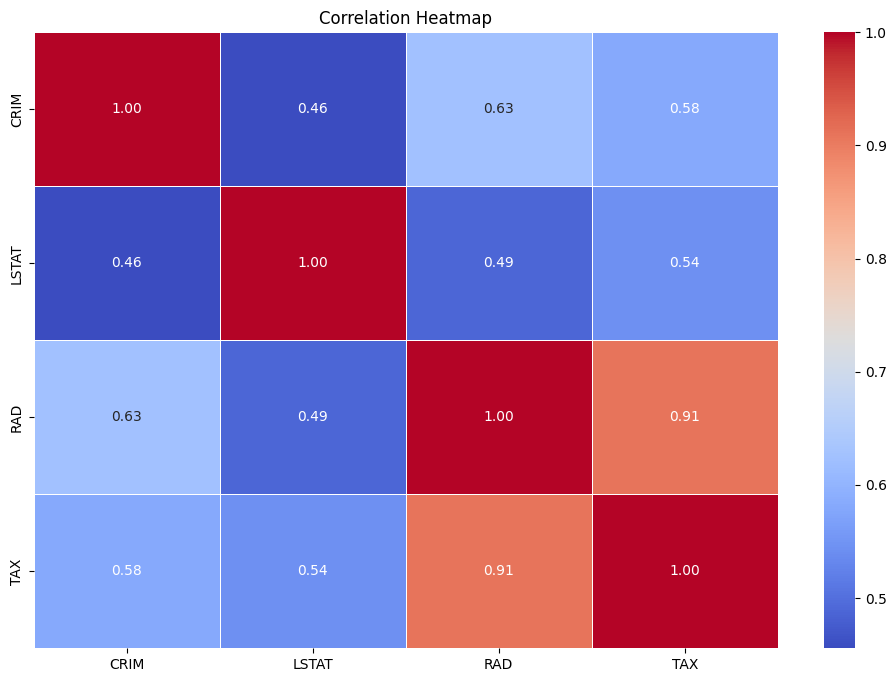

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = top_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [49]:
from sklearn.model_selection import train_test_split

X_data = top_df.drop(['CRIM'], axis=1)
y_data = top_df['CRIM']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, scaling=True):
    if scaling:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_scaled = X_train
        X_test_scaled = X_test

    model.fit(X_scaled, y_train)

    y_pred = model.predict(X_scaled)

    y_pred_test = model.predict(X_test_scaled)

    mae_train = mean_absolute_error(y_train, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    print(f'Model: {type(model).__name__}')
    print("훈련 세트 MAE:", mae_train)
    print("테스트 세트 MAE:", mae_test)

    return y_pred_test

# SVR 모델과 결정 트리 모델을 각각 학습하고 평가
svm_model = SVR()
dt_model = DecisionTreeRegressor()

# svm
y_pred_test =  train_and_evaluate_model(svm_model, X_train, y_train, X_test, y_test, scaling=True)
y_pred_test2 = train_and_evaluate_model(svm_model, X_train, y_train, X_test, y_test, scaling=False)

# DTree
y_pred_test3 = train_and_evaluate_model(dt_model, X_train, y_train, X_test, y_test, scaling=True)
y_pred_test4 = train_and_evaluate_model(dt_model, X_train, y_train, X_test, y_test, scaling=False)

Model: SVR
훈련 세트 MAE: 1.8360280524440968
테스트 세트 MAE: 1.7310401106394824
Model: SVR
훈련 세트 MAE: 2.1911117347792715
테스트 세트 MAE: 2.2744530326118633
Model: DecisionTreeRegressor
훈련 세트 MAE: 0.03983160891089108
테스트 세트 MAE: 3.3569630392156866
Model: DecisionTreeRegressor
훈련 세트 MAE: 0.03983160891089108
테스트 세트 MAE: 3.4007154901960783


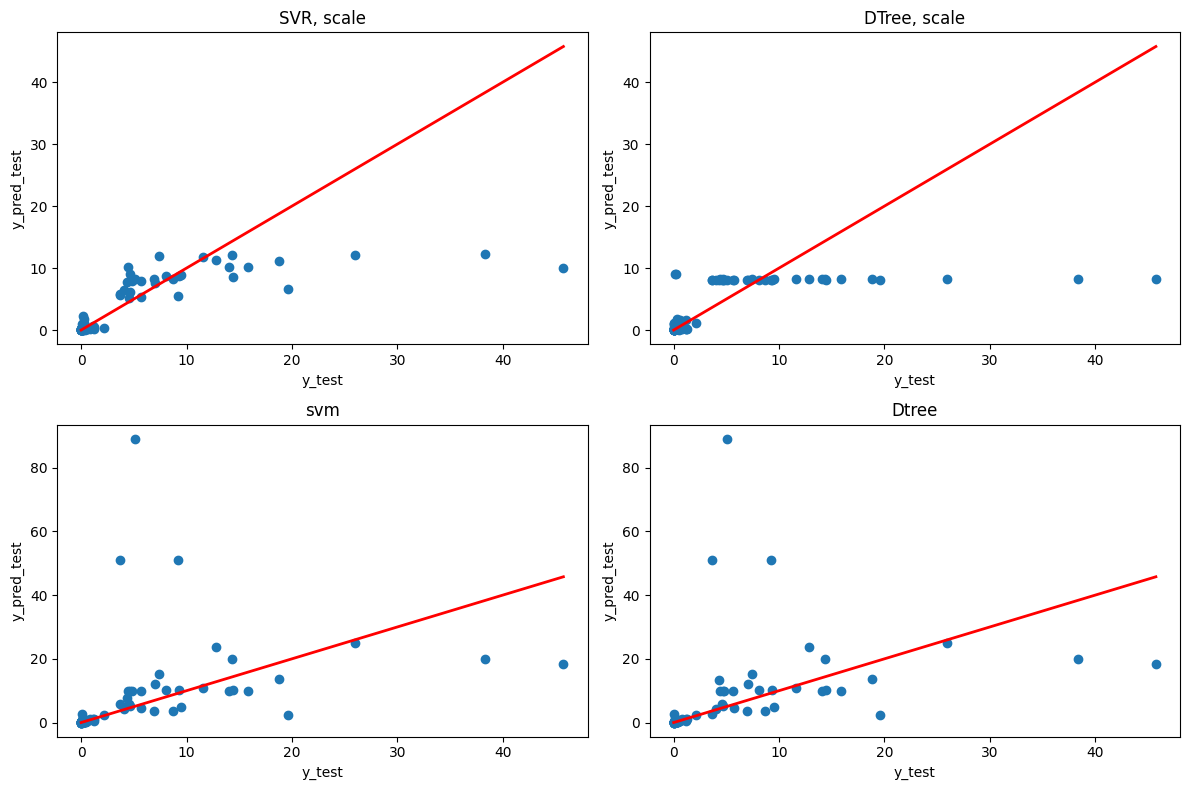

In [70]:
import matplotlib.pyplot as plt

def visualize_results(y_test, y_pred_list, model_names):
    num_models = len(y_pred_list)

    plt.figure(figsize=(12, 8))

    for i in range(num_models):
        plt.subplot(2, 2, i + 1)
        plt.scatter(y_test, y_pred_list[i])
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
        plt.xlabel('y_test')
        plt.ylabel('y_pred_test')
        plt.title(model_names[i])

    plt.tight_layout()
    plt.show()

y_pred_list = [y_pred_test, y_pred_test2, y_pred_test3, y_pred_test4]
model_names = ['SVR, scale', 'DTree, scale', 'svm', 'Dtree']

visualize_results(y_test, y_pred_list, model_names)
